# 多层神经网络


## 1. 神经元

神经元和感知器本质上是一样的，只不过我们说感知器的时候，它的激活函数是阶跃函数；而当我们说神经元时，激活函数往往选择为sigmoid函数或tanh函数。如下图所示：

![neuron](images/neuron.gif)

计算一个神经元的输出的方法和计算一个感知器的输出是一样的。假设神经元的输入是向量$\vec{x}$，权重向量是$\vec{w}$(偏置项是$w_0$)，激活函数是sigmoid函数，则其输出y：
$$
y = sigmod(\vec{w}^T \cdot \vec{x})
$$

sigmoid函数的定义如下：
$$
sigmod(x) = \frac{1}{1+e^{-x}}
$$
将其带入前面的式子，得到
$$
y = \frac{1}{1+e^{-\vec{w}^T \cdot \vec{x}}}
$$

sigmoid函数是一个非线性函数，值域是(0,1)。函数图像如下图所示

![sigmod_function](images/sigmod.jpg)

sigmoid函数的导数是：
\begin{eqnarray}
y & = & sigmod(x) \tag{1} \\
y' & = & y(1-y)
\end{eqnarray}

可以看到，sigmoid函数的导数非常有趣，它可以用sigmoid函数自身来表示。这样，一旦计算出sigmoid函数的值，计算它的导数的值就非常方便。



## 2. 神经网络是啥?

![nn1](images/nn1.jpeg)

神经网络其实就是按照一定规则连接起来的多个神经元。上图展示了一个全连接(full connected, FC)神经网络，通过观察上面的图，我们可以发现它的规则包括：

* 神经元按照层来布局。
    - 最左边的层叫做输入层，负责接收输入数据；
    - 最右边的层叫输出层，我们可以从这层获取神经网络输出数据;
    - 输入层和输出层之间的层叫做隐藏层，因为它们对于外部来说是不可见的。
* 同一层的神经元之间没有连接。
* 第N层的每个神经元和第N-1层的所有神经元相连(这就是full connected的含义)，第N-1层神经元的输出就是第N层神经元的输入。
* 每个连接都有一个权值。

上面这些规则定义了全连接神经网络的结构。事实上还存在很多其它结构的神经网络，比如卷积神经网络(CNN)、循环神经网络(RNN)，他们都具有不同的连接规则。


## 3. 计算神经网络的输出

神经网络实际上就是一个输入向量$\vec{x}$到输出向量$\vec{y}$的函数，即：

$$
\vec{y} = f_{network}(\vec{x})
$$
根据输入计算神经网络的输出，需要首先将输入向量$\vec{x}$的每个元素的值$x_i$赋给神经网络的输入层的对应神经元，然后根据式1依次向前计算每一层的每个神经元的值，直到最后一层输出层的所有神经元的值计算完毕。最后，将输出层每个神经元的值串在一起就得到了输出向量$\vec{y}$。


接下来举一个例子来说明这个过程，我们先给神经网络的每个单元写上编号。

![nn2](images/nn2.png)

* 输入层有三个节点，我们将其依次编号为1、2、3；
* 隐藏层的4个节点，编号依次为4、5、6、7；
* 最后输出层的两个节点编号为8、9。

因为我们这个神经网络是全连接网络，所以可以看到每个节点都和上一层的所有节点有连接。比如，我们可以看到隐藏层的节点4，它和输入层的三个节点1、2、3之间都有连接，其连接上的权重分别为$w_{41}$,$w_{42}$,$w_{43}$。那么，我们怎样计算节点4的输出值$a_4$呢？



为了计算节点4的输出值，我们必须先得到其所有上游节点（也就是节点1、2、3）的输出值。节点1、2、3是输入层的节点，所以，他们的输出值就是输入向量$\vec{x}$本身。按照上图画出的对应关系，可以看到节点1、2、3的输出值分别是$x_1$,$x_2$,$x_3$。我们要求输入向量的维度和输入层神经元个数相同，而输入向量的某个元素对应到哪个输入节点是可以自由决定的。

一旦我们有了节点1、2、3的输出值，我们就可以根据式1计算节点4的输出值$a_4$：

![eqn_3_4](images/eqn_3_4.png)

上式的$w_{4b}$是节点4的偏置项，图中没有画出来。而$w_{41}$,$w_{42}$,$w_{43}$分别为节点1、2、3到节点4连接的权重，在给权重$w_{ji}$编号时，我们把目标节点的编号$j$放在前面，把源节点的编号$i$放在后面。


同样，我们可以继续计算出节点5、6、7的输出值$a_5$,$a_6$,$a_7$。这样，隐藏层的4个节点的输出值就计算完成了，我们就可以接着计算输出层的节点8的输出值$y_1$：

![eqn_5_6](images/eqn_5_6.png)

同理，我们还可以计算出$y_2$的值。这样输出层所有节点的输出值计算完毕，我们就得到了在输入向量$\vec{x} = (x_1, x_2, x_3)^T$时，神经网络的输出向量$\vec{y} = (y_1, y_2)^T$。这里我们也看到，输出向量的维度和输出层神经元个数相同。


## 4. 神经网络的矩阵表示

神经网络的计算如果用矩阵来表示会很方便，此外可以用优化加速算法提高计算速度。

我们先来看看隐藏层的矩阵表示，隐藏层4个节点的计算依次排列出来：

![eqn_hidden_units](images/eqn_hidden_units.png)

接着，定义网络的输入向量$\vec{x}$和隐藏层每个节点的权重向量$\vec{w}$。令

![eqn_7_12](images/eqn_7_12.png)

代入到前面的一组式子，得到：

![eqn_13_16](images/eqn_13_16.png)

现在，我们把上述计算$a_4$, $a_5$,$a_6$,$a_7$的四个式子写到一个矩阵里面，每个式子作为矩阵的一行，就可以利用矩阵来表示它们的计算了。令

![eqn_matrix1](images/eqn_matrix1.png)

带入前面的一组式子，得到

![formular_2](images/formular_2.png)


在式2中，$f$是激活函数，在本例中是$sigmod$函数；$W$是某一层的权重矩阵；$\vec{x}$是某层的输入向量；$\vec{a}$是某层的输出向量。式2说明神经网络的每一层的作用实际上就是先将输入向量左乘一个数组进行线性变换，得到一个新的向量，然后再对这个向量逐元素应用一个激活函数。

每一层的算法都是一样的。比如，对于包含一个输入层，一个输出层和三个隐藏层的神经网络，我们假设其权重矩阵分别为$W_1$,$W_2$,$W_3$,$W_4$，每个隐藏层的输出分别是$\vec{a}_1$,$\vec{a}_2$,$\vec{a}_3$，神经网络的输入为$\vec{x}$，神经网络的输出为$\vec{y}$，如下图所示：

![nn_parameters_demo](images/nn_parameters_demo.png)

则每一层的输出向量的计算可以表示为：

![eqn_17_20](images/eqn_17_20.png)


这就是神经网络输出值的矩阵计算方法。

如果写成一个公式：
$$
\vec{y} = f(W4 \cdot f(W3 \cdot f(W2 \cdot f(W1 \cdot \vec{x}))))
$$


神经网络正向计算的过程比较简单，就是一层一层不断做运算就可以了，动态的演示如下图所示：
![](images/nn-forward.gif)

## 5. 神经网络的训练 - 反向传播算法

神经网络的每个连接上的权值如果知道，那么就可以将输入数据代入得到希望的结果。我们可以说神经网络是一个模型，那么这些权值就是**模型的参数**，也就是模型要学习的东西。然而，一个神经网络的连接方式、网络的层数、每层的节点数这些参数，则不是学习出来的，而是人为事先设置的。对于这些人为设置的参数，我们称之为**超参数(Hyper-Parameters)**。

前面课程中所学的最小二乘、逻辑回归等可以直接优化损失函数来求解模型参数的更新值。在多层神经网络中，最后一层的参数可以用这样的方式求解得到；隐层节点没有输出的真值，因此无法直接构建损失函数来求解，如何化解这个难题？

反向传播算法其实就是链式求导法则的应用。然而，这个如此简单且显而易见的方法，却是在Roseblatt提出感知器算法将近30年之后才被发明和普及的。对此，Bengio这样回应道：

> 很多看似显而易见的想法只有在事后才变得显而易见。

按照机器学习的通用套路，我们先确定神经网络的目标函数，然后用随机梯度下降优化算法去求目标函数最小值时的参数值。

我们取网络所有输出层节点的误差平方和作为目标函数：

![bp_loss](images/bp_loss.png)

其中，$E_d$表示是样本$d$的误差, **t是样本的标签值**，**y是神经网络的输出值**。

然后，使用随机梯度下降算法对目标函数进行优化：

![bp_weight_update](images/bp_weight_update.png)

随机梯度下降算法也就是需要求出误差$E_d$对于每个权重$w_{ji}$的偏导数（也就是梯度），怎么求呢？

![nn3](images/nn3.png)

观察上图，我们发现权重$w_{ji}$仅能通过影响节点$j$的输入值影响网络的其它部分，设$net_j$是节点$j$的加权输入，即

![eqn_21_22](images/eqn_21_22.png)

$E_d$是$net_j$的函数，而$net_j$是$w_{ji}$的函数。根据链式求导法则，可以得到：(FIXME: change i -> k)

![eqn_23_25](images/eqn_23_25.png)


上式中，$x_{ji}$是节点传递给节点$j$的输入值，也就是节点$i$的输出值。

对于的$\frac{\partial E_d}{\partial net_j}$推导，需要区分输出层和隐藏层两种情况。



### 5.1 输出层权值训练

![nn3](images/nn3.png)

对于输出层来说，$net_j$仅能通过节点$j$的输出值$y_j$来影响网络其它部分，也就是说$E_d$是$y_j$的函数，而$y_j$是$net_j$的函数，其中$y_j = sigmod(net_j)$。所以我们可以再次使用链式求导法则：

![eqn_26](images/eqn_26.png)

考虑上式第一项:

![eqn_27_29](images/eqn_27_29.png)


考虑上式第二项：

![eqn_30_31](images/eqn_30_31.png)

将第一项和第二项带入，得到：

![eqn_ed_net_j.png](images/eqn_ed_net_j.png)

如果令$\delta_j = - \frac{\partial E_d}{\partial net_j}$，也就是一个节点的误差项$\delta$是网络误差对这个节点输入的偏导数的相反数。带入上式，得到：

![eqn_delta_j.png](images/eqn_delta_j.png)

将上述推导带入随机梯度下降公式，得到：

![eqn_32_34.png](images/eqn_32_34.png)


### 5.2 隐藏层权值训练

现在我们要推导出隐藏层的$\frac{\partial E_d}{\partial net_j}$。

![nn3](images/nn3.png)

首先，我们需要定义节点$j$的所有直接下游节点的集合$Downstream(j)$。例如，对于节点4来说，它的直接下游节点是节点8、节点9。可以看到$net_j$只能通过影响$Downstream(j)$再影响$E_d$。设$net_k$是节点$j$的下游节点的输入，则$E_d$是$net_k$的函数，而$net_k$是$net_j$的函数。因为$net_k$有多个，我们应用全导数公式，可以做出如下推导：

![eqn_35_40](images/eqn_35_40.png)

因为$\delta_j = - \frac{\partial E_d}{\partial net_j}$，带入上式得到：

![eqn_delta_hidden.png](images/eqn_delta_hidden.png)


至此，我们已经推导出了反向传播算法。需要注意的是，我们刚刚推导出的训练规则是根据激活函数是sigmoid函数、平方和误差、全连接网络、随机梯度下降优化算法。如果激活函数不同、误差计算方式不同、网络连接结构不同、优化算法不同，则具体的训练规则也会不一样。但是无论怎样，训练规则的推导方式都是一样的，应用链式求导法则进行推导即可。


###  5.3 具体解释

我们假设每个训练样本为$(\vec{x}, \vec{t})$，其中向量$\vec{x}$是训练样本的特征，而$\vec{t}$是样本的目标值。

![nn3](images/nn3.png)

首先，我们根据上一节介绍的算法，用样本的特征$\vec{x}$，计算出神经网络中每个隐藏层节点的输出$a_i$，以及输出层每个节点的输出$y_i$。

然后，我们按照下面的方法计算出每个节点的误差项$\delta_i$：

* **对于输出层节点$i$**

![formular_3.png](images/formular_3.png)

其中，$\delta_i$是节点$i$的误差项，$y_i$是节点$i$的输出值，$t_i$是样本对应于节点$i$的目标值。举个例子，根据上图，对于输出层节点8来说，它的输出值是$y_1$，而样本的目标值是$t_1$，带入上面的公式得到节点8的误差项应该是：

![forumlar_delta8.png](images/forumlar_delta8.png)

* **对于隐藏层节点**

![formular_4.png](images/formular_4.png)

其中，$a_i$是节点$i$的输出值，$w_{ki}$是节点$i$到它的下一层节点$k$的连接的权重，$\delta_k$是节点$i$的下一层节点$k$的误差项。例如，对于隐藏层节点4来说，计算方法如下：

![forumlar_delta4.png](images/forumlar_delta4.png)



最后，更新每个连接上的权值：

![formular_5.png](images/formular_5.png)

其中，$w_{ji}$是节点$i$到节点$j$的权重，$\eta$是一个成为学习速率的常数，$\delta_j$是节点$j$的误差项，$x_{ji}$是节点$i$传递给节点$j$的输入。例如，权重$w_{84}$的更新方法如下：

![eqn_w84_update.png](images/eqn_w84_update.png)

类似的，权重$w_{41}$的更新方法如下：

![eqn_w41_update.png](images/eqn_w41_update.png)


偏置项的输入值永远为1。例如，节点4的偏置项$w_{4b}$应该按照下面的方法计算：

![eqn_w4b_update.png](images/eqn_w4b_update.png)

我们已经介绍了神经网络每个节点误差项的计算和权重更新方法。显然，计算一个节点的误差项，需要先计算每个与其相连的下一层节点的误差项。这就要求误差项的计算顺序必须是从输出层开始，然后反向依次计算每个隐藏层的误差项，直到与输入层相连的那个隐藏层。这就是反向传播算法的名字的含义。当所有节点的误差项计算完毕后，我们就可以根据式5来更新所有的权重。



## 6. 为什么要使用激活函数
激活函数在神经网络中非常重要，使用激活函数也是非常必要的，前面我们从人脑神经元的角度理解了激活函数，因为神经元需要通过激活才能往后传播，所以神经网络中需要激活函数，下面我们从数学的角度理解一下激活函数的必要性。

比如一个两层的神经网络，使用 A 表示激活函数，那么

$$
y = w_2 A(w_1 x)
$$

如果我们不使用激活函数，那么神经网络的结果就是

$$
y = w_2 (w_1 x) = (w_2 w_1) x = \bar{w} x
$$

可以看到，我们将两层神经网络的参数合在一起，用 $\bar{w}$ 来表示，两层的神经网络其实就变成了一层神经网络，只不过参数变成了新的 $\bar{w}$，所以如果不使用激活函数，那么不管多少层的神经网络，$y = w_n \cdots w_2 w_1 x = \bar{w} x$，就都变成了单层神经网络，所以在每一层我们都必须使用激活函数。


最后我们看看激活函数对神经网络的影响

![](images/nn-activation-function.gif)

可以看到使用了激活函数之后，神经网络可以通过改变权重实现任意形状，越是复杂的神经网络能拟合的形状越复杂，这就是著名的神经网络万有逼近定理。神经网络使用的激活函数都是非线性的，每个激活函数都输入一个值，然后做一种特定的数学运算得到一个结果。


### 6.1 sigmoid 激活函数

$$\sigma(x) = \frac{1}{1 + e^{-x}}$$

![](images/act-sigmoid.jpg)

### 6.2 tanh 激活函数

$$tanh(x) = 2 \sigma(2x) - 1$$

![](images/act-tanh.jpg)


### 6.3 ReLU 激活函数

$$ReLU(x) = max(0, x)$$

![](images/act-relu.jpg)

当输入 $x<0$ 时，输出为 $0$，当 $x> 0$ 时，输出为 $x$。该激活函数使网络更快速地收敛。它不会饱和，即它可以对抗梯度消失问题，至少在正区域（$x> 0$ 时）可以这样，因此神经元至少在一半区域中不会把所有零进行反向传播。由于使用了简单的阈值化（thresholding），ReLU 计算效率很高。


在网络中，不同的输入可能包含着大小不同关键特征，使用大小可变的数据结构去做容器，则更加灵活。假如神经元激活具有稀疏性，那么不同激活路径上：不同数量（选择性不激活）、不同功能（分布式激活）。两种可优化的结构生成的激活路径，可以更好地从有效的数据的维度上，学习到相对稀疏的特征，起到自动化解离效果。

![](images/nn-sparse.png)

稀疏特征并不需要网络具有很强的处理线性不可分机制，因此在深度学习模型中，使用简单、速度快的线性激活函数可能更为合适。如图，一旦神经元与神经元之间改为线性激活，网络的非线性部分仅仅来自于神经元部分选择性激活。


更倾向于使用线性神经激活函数的另外一个原因是，减轻梯度法训练深度网络时的Vanishing Gradient Problem。


看过BP推导的人都知道，误差从输出层反向传播算梯度时，在各层都要乘当前层的输入神经元值，激活函数的一阶导数。
$$
grad = error ⋅ sigmoid'(x) ⋅ x
$$

使用双端饱和(即值域被限制)Sigmoid系函数会有两个问题：

1. sigmoid'(x) ∈ (0,1)  导数缩放
2. x∈(0,1)或x∈(-1,1)  饱和值缩放

这样，经过每一层时，Error都是成倍的衰减，一旦进行递推式的多层的反向传播，梯度就会不停的衰减，消失，使得网络学习变慢。而校正激活函数的梯度是1，且只有一端饱和，梯度很好的在反向传播中流动，训练速度得到了很大的提高。

## 7. 算法与处理步骤

```
# 每次训练
for k in range(epoch)
    # 正向计算
    for j in range(NN_depth):
        # 式2 ( a = xxx)
        X_j = f( W_{j, j-1} X_{j-1})

    ＃ 反向误差计算
    for j in range(NN_depth, 0, -1):
        # 式3， 式4
        delta = y_i(1-y_i)(t_i-y_i)
        or 
        delta = a_i(1-a_i) \sum w_ki delta_k

        # 式5
        w_ji = w_j + epsilon delta_j x_ji
```


## 8. 示例程序

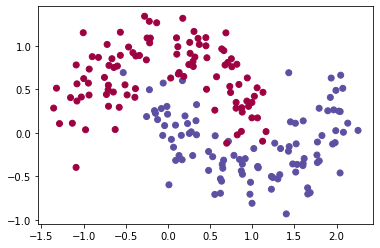

In [1]:
%matplotlib inline

import numpy as np
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

# generate sample data
np.random.seed(0)
X, y = datasets.make_moons(200, noise=0.20)

# generate nn output target
t = np.zeros((X.shape[0], 2))
t[np.where(y==0), 0] = 1
t[np.where(y==1), 1] = 1

# plot data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
plt.show()

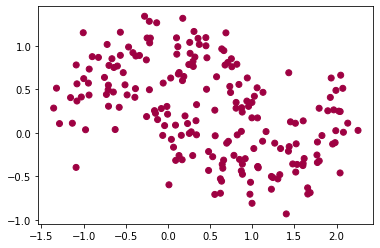

In [7]:
# generate the NN model
class NN_Model:
    epsilon = 0.01               # learning rate
    n_epoch = 1000               # iterative number
    
nn = NN_Model()
nn.n_input_dim = X.shape[1]      # input size
nn.n_output_dim = 2              # output node size
nn.n_hide_dim = 8                # hidden node size

nn.X = X
nn.y = y    

# initial weight array
nn.W1 = np.random.randn(nn.n_input_dim, nn.n_hide_dim) / np.sqrt(nn.n_input_dim)
nn.b1 = np.zeros((1, nn.n_hide_dim))
nn.W2 = np.random.randn(nn.n_hide_dim, nn.n_output_dim) / np.sqrt(nn.n_hide_dim)
nn.b2 = np.zeros((1, nn.n_output_dim))

# define sigmod & its derivate function
def sigmod(X):
    return 1.0/(1+np.exp(-X))

# network forward calculation
def forward(n, X):
    n.z1 = sigmod(X.dot(n.W1) + n.b1)
    n.z2 = sigmod(n.z1.dot(n.W2) + n.b2)
    return n


# use random weight to perdict
forward(nn, X)
y_pred = np.argmax(nn.z2, axis=1)

# plot data
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=plt.cm.Spectral)
plt.show()

In [8]:
# FIXME: change variable name to math

from sklearn.metrics import accuracy_score

y_true = np.array(nn.y).astype(float)

# back-propagation
def backpropagation(n, X, y):
    for i in range(n.n_epoch):
        # forward to calculate each node's output
        forward(n, X)
        
        # print loss, accuracy
        L = np.sum((n.z2 - y)**2)
        
        y_pred = np.argmax(nn.z2, axis=1)
        acc = accuracy_score(y_true, y_pred)
        
        print("epoch [%4d] L = %f, acc = %f" % (i, L, acc))
        
        # calc weights update
        d2 = n.z2*(1-n.z2)*(y - n.z2)
        d1 = n.z1*(1-n.z1)*(np.dot(d2, n.W2.T))
        
        # update weights
        n.W2 += n.epsilon * np.dot(n.z1.T, d2)
        n.b2 += n.epsilon * np.sum(d2, axis=0)
        n.W1 += n.epsilon * np.dot(X.T, d1)
        n.b1 += n.epsilon * np.sum(d1, axis=0)

nn.n_epoch = 2000
backpropagation(nn, X, t)


epoch [   0] L = 109.763265, acc = 0.500000
epoch [   1] L = 103.996033, acc = 0.500000
epoch [   2] L = 100.061412, acc = 0.500000
epoch [   3] L = 97.202024, acc = 0.615000
epoch [   4] L = 94.891877, acc = 0.815000
epoch [   5] L = 92.856687, acc = 0.805000
epoch [   6] L = 90.969326, acc = 0.800000
epoch [   7] L = 89.173360, acc = 0.795000
epoch [   8] L = 87.443892, acc = 0.795000
epoch [   9] L = 85.769759, acc = 0.790000
epoch [  10] L = 84.145805, acc = 0.785000
epoch [  11] L = 82.569580, acc = 0.795000
epoch [  12] L = 81.039921, acc = 0.800000
epoch [  13] L = 79.556306, acc = 0.800000
epoch [  14] L = 78.118541, acc = 0.800000
epoch [  15] L = 76.726582, acc = 0.800000
epoch [  16] L = 75.380423, acc = 0.795000
epoch [  17] L = 74.080019, acc = 0.790000
epoch [  18] L = 72.825231, acc = 0.800000
epoch [  19] L = 71.615794, acc = 0.790000
epoch [  20] L = 70.451292, acc = 0.795000
epoch [  21] L = 69.331151, acc = 0.795000
epoch [  22] L = 68.254644, acc = 0.795000
epoch [ 

epoch [ 449] L = 38.345708, acc = 0.860000
epoch [ 450] L = 38.343956, acc = 0.860000
epoch [ 451] L = 38.342200, acc = 0.860000
epoch [ 452] L = 38.340443, acc = 0.860000
epoch [ 453] L = 38.338682, acc = 0.860000
epoch [ 454] L = 38.336919, acc = 0.860000
epoch [ 455] L = 38.335153, acc = 0.860000
epoch [ 456] L = 38.333384, acc = 0.860000
epoch [ 457] L = 38.331612, acc = 0.860000
epoch [ 458] L = 38.329836, acc = 0.860000
epoch [ 459] L = 38.328058, acc = 0.860000
epoch [ 460] L = 38.326277, acc = 0.860000
epoch [ 461] L = 38.324492, acc = 0.860000
epoch [ 462] L = 38.322704, acc = 0.860000
epoch [ 463] L = 38.320913, acc = 0.860000
epoch [ 464] L = 38.319118, acc = 0.860000
epoch [ 465] L = 38.317320, acc = 0.860000
epoch [ 466] L = 38.315518, acc = 0.860000
epoch [ 467] L = 38.313713, acc = 0.860000
epoch [ 468] L = 38.311904, acc = 0.860000
epoch [ 469] L = 38.310091, acc = 0.860000
epoch [ 470] L = 38.308274, acc = 0.860000
epoch [ 471] L = 38.306453, acc = 0.860000
epoch [ 472

epoch [ 927] L = 35.696664, acc = 0.875000
epoch [ 928] L = 35.683120, acc = 0.875000
epoch [ 929] L = 35.669529, acc = 0.875000
epoch [ 930] L = 35.655891, acc = 0.875000
epoch [ 931] L = 35.642206, acc = 0.875000
epoch [ 932] L = 35.628473, acc = 0.875000
epoch [ 933] L = 35.614693, acc = 0.875000
epoch [ 934] L = 35.600866, acc = 0.875000
epoch [ 935] L = 35.586991, acc = 0.875000
epoch [ 936] L = 35.573069, acc = 0.875000
epoch [ 937] L = 35.559101, acc = 0.875000
epoch [ 938] L = 35.545085, acc = 0.875000
epoch [ 939] L = 35.531022, acc = 0.875000
epoch [ 940] L = 35.516913, acc = 0.875000
epoch [ 941] L = 35.502757, acc = 0.875000
epoch [ 942] L = 35.488553, acc = 0.875000
epoch [ 943] L = 35.474304, acc = 0.875000
epoch [ 944] L = 35.460007, acc = 0.875000
epoch [ 945] L = 35.445664, acc = 0.875000
epoch [ 946] L = 35.431274, acc = 0.875000
epoch [ 947] L = 35.416838, acc = 0.875000
epoch [ 948] L = 35.402356, acc = 0.875000
epoch [ 949] L = 35.387827, acc = 0.875000
epoch [ 950

epoch [1388] L = 26.948352, acc = 0.920000
epoch [1389] L = 26.929880, acc = 0.920000
epoch [1390] L = 26.911427, acc = 0.920000
epoch [1391] L = 26.892995, acc = 0.920000
epoch [1392] L = 26.874582, acc = 0.920000
epoch [1393] L = 26.856190, acc = 0.920000
epoch [1394] L = 26.837818, acc = 0.920000
epoch [1395] L = 26.819466, acc = 0.920000
epoch [1396] L = 26.801134, acc = 0.920000
epoch [1397] L = 26.782823, acc = 0.920000
epoch [1398] L = 26.764531, acc = 0.920000
epoch [1399] L = 26.746260, acc = 0.925000
epoch [1400] L = 26.728010, acc = 0.925000
epoch [1401] L = 26.709779, acc = 0.925000
epoch [1402] L = 26.691569, acc = 0.925000
epoch [1403] L = 26.673380, acc = 0.925000
epoch [1404] L = 26.655211, acc = 0.925000
epoch [1405] L = 26.637063, acc = 0.925000
epoch [1406] L = 26.618935, acc = 0.925000
epoch [1407] L = 26.600828, acc = 0.925000
epoch [1408] L = 26.582741, acc = 0.925000
epoch [1409] L = 26.564675, acc = 0.925000
epoch [1410] L = 26.546630, acc = 0.925000
epoch [1411

epoch [1842] L = 20.680203, acc = 0.945000
epoch [1843] L = 20.670426, acc = 0.945000
epoch [1844] L = 20.660661, acc = 0.945000
epoch [1845] L = 20.650909, acc = 0.945000
epoch [1846] L = 20.641171, acc = 0.945000
epoch [1847] L = 20.631445, acc = 0.945000
epoch [1848] L = 20.621733, acc = 0.945000
epoch [1849] L = 20.612033, acc = 0.945000
epoch [1850] L = 20.602346, acc = 0.945000
epoch [1851] L = 20.592673, acc = 0.945000
epoch [1852] L = 20.583012, acc = 0.945000
epoch [1853] L = 20.573363, acc = 0.945000
epoch [1854] L = 20.563728, acc = 0.945000
epoch [1855] L = 20.554105, acc = 0.945000
epoch [1856] L = 20.544495, acc = 0.945000
epoch [1857] L = 20.534897, acc = 0.945000
epoch [1858] L = 20.525312, acc = 0.945000
epoch [1859] L = 20.515740, acc = 0.945000
epoch [1860] L = 20.506181, acc = 0.945000
epoch [1861] L = 20.496633, acc = 0.945000
epoch [1862] L = 20.487099, acc = 0.945000
epoch [1863] L = 20.477576, acc = 0.945000
epoch [1864] L = 20.468067, acc = 0.945000
epoch [1865

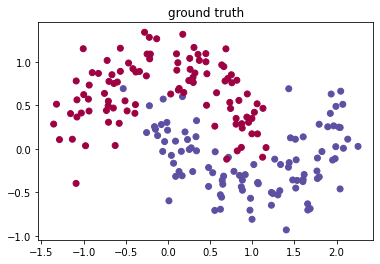

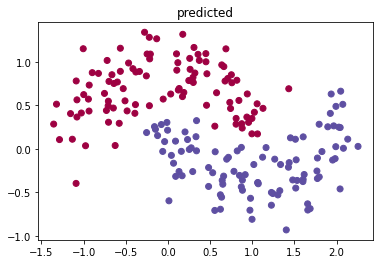

In [9]:
# plot data
y_pred = np.argmax(nn.z2, axis=1)

plt.scatter(X[:, 0], X[:, 1], c=nn.y, cmap=plt.cm.Spectral)
plt.title("ground truth")
plt.show()

plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=plt.cm.Spectral)
plt.title("predicted")
plt.show()


## 9. 如何使用类的方法封装多层神经网络?

In [10]:
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


# define sigmod
def sigmod(X):
    return 1.0/(1+np.exp(-X))


# generate the NN model
class NN_Model:
    def __init__(self, nodes=None):
        self.epsilon = 0.01                 # learning rate
        self.n_epoch = 1000                 # iterative number
        
        if not nodes:
            self.nodes = [2, 6, 2]          # default nodes size (from input -> output)
        else:
            self.nodes = nodes
    
    def init_weight(self):
        W = []
        B = []
        
        n_layer = len(self.nodes)
        for i in range(n_layer-1):
            w = np.random.randn(self.nodes[i], self.nodes[i+1]) / np.sqrt(self.nodes[i])
            b = np.random.randn(1, self.nodes[i+1])
            
            W.append(w)
            B.append(b)
            
        self.W = W
        self.B = B
    
    def forward(self, X):
        Z = []
        x0 = X
        for i in range(len(self.nodes)-1):
            z = sigmod(np.dot(x0, self.W[i]) + self.B[i])
            x0 = z
            
            Z.append(z)
        
        self.Z = Z
        return Z[-1]
        
    # back-propagation
    def backpropagation(self, X, y, n_epoch=None, epsilon=None):
        if not n_epoch: n_epoch = self.n_epoch
        if not epsilon: epsilon = self.epsilon
        
        self.X = X
        self.Y = y
        
        for i in range(n_epoch):
            # forward to calculate each node's output
            self.forward(X)

            self.evaluate()
            
            # calc weights update
            W = self.W
            B = self.B
            Z = self.Z
            
            D = []
            d0 = y
            n_layer = len(self.nodes)
            for j in range(n_layer-1, 0, -1):
                jj = j - 1
                z = self.Z[jj]
                
                if j == n_layer - 1:
                    d = z*(1-z)*(d0 - z)
                else:
                    d = z*(1-z)*np.dot(d0, W[j].T)
                    
                d0 = d
                D.insert(0, d)
            
            # update weights
            for j in range(n_layer-1, 0, -1):
                jj = j - 1
                
                if jj != 0:
                    W[jj] += epsilon * np.dot(Z[jj-1].T, D[jj])
                else:
                    W[jj] += epsilon * np.dot(X.T, D[jj])
                    
                B[jj] += epsilon * np.sum(D[jj], axis=0)
        
    def evaluate(self):
        z = self.Z[-1]
        
        # print loss, accuracy
        L = np.sum((z - self.Y)**2)
            
        y_pred = np.argmax(z, axis=1)
        y_true = np.argmax(self.Y, axis=1)
        acc = accuracy_score(y_true, y_pred)
        
        print("L = %f, acc = %f" % (L, acc))
        

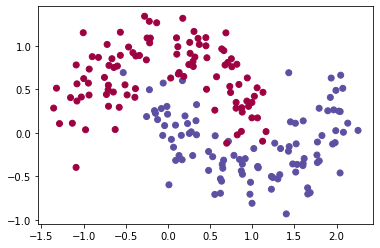

In [11]:
# generate sample data
np.random.seed(0)
X, y = datasets.make_moons(200, noise=0.20)

# generate nn output target
t = np.zeros((X.shape[0], 2))
t[np.where(y==0), 0] = 1
t[np.where(y==1), 1] = 1

# plot data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
plt.show()

In [12]:
# use the NN model and training
nn = NN_Model([2, 6, 4, 2])
nn.init_weight()
nn.backpropagation(X, t, 2000)



L = 121.621107, acc = 0.500000
L = 115.928422, acc = 0.500000
L = 111.304997, acc = 0.500000
L = 107.789222, acc = 0.500000
L = 105.265297, acc = 0.500000
L = 103.533617, acc = 0.500000
L = 102.380546, acc = 0.500000
L = 101.622557, acc = 0.500000
L = 101.121698, acc = 0.500000
L = 100.782803, acc = 0.510000
L = 100.543751, acc = 0.530000
L = 100.365372, acc = 0.540000
L = 100.223492, acc = 0.520000
L = 100.103371, acc = 0.475000
L = 99.996073, acc = 0.460000
L = 99.896185, acc = 0.465000
L = 99.800411, acc = 0.465000
L = 99.706725, acc = 0.495000
L = 99.613854, acc = 0.515000
L = 99.520981, acc = 0.560000
L = 99.427551, acc = 0.585000
L = 99.333171, acc = 0.630000
L = 99.237541, acc = 0.660000
L = 99.140415, acc = 0.690000
L = 99.041582, acc = 0.705000
L = 98.940844, acc = 0.710000
L = 98.838015, acc = 0.720000
L = 98.732913, acc = 0.740000
L = 98.625357, acc = 0.745000
L = 98.515164, acc = 0.755000
L = 98.402148, acc = 0.785000
L = 98.286120, acc = 0.790000
L = 98.166887, acc = 0.800

L = 37.619612, acc = 0.865000
L = 37.605693, acc = 0.865000
L = 37.591696, acc = 0.865000
L = 37.577620, acc = 0.865000
L = 37.563463, acc = 0.865000
L = 37.549225, acc = 0.870000
L = 37.534905, acc = 0.865000
L = 37.520503, acc = 0.865000
L = 37.506017, acc = 0.865000
L = 37.491447, acc = 0.865000
L = 37.476792, acc = 0.865000
L = 37.462052, acc = 0.865000
L = 37.447224, acc = 0.865000
L = 37.432310, acc = 0.865000
L = 37.417307, acc = 0.865000
L = 37.402215, acc = 0.865000
L = 37.387033, acc = 0.865000
L = 37.371761, acc = 0.865000
L = 37.356398, acc = 0.865000
L = 37.340942, acc = 0.865000
L = 37.325393, acc = 0.865000
L = 37.309751, acc = 0.865000
L = 37.294013, acc = 0.865000
L = 37.278181, acc = 0.865000
L = 37.262252, acc = 0.865000
L = 37.246226, acc = 0.865000
L = 37.230101, acc = 0.865000
L = 37.213879, acc = 0.865000
L = 37.197556, acc = 0.865000
L = 37.181133, acc = 0.865000
L = 37.164609, acc = 0.865000
L = 37.147983, acc = 0.865000
L = 37.131254, acc = 0.865000
L = 37.114

L = 20.437401, acc = 0.945000
L = 20.394926, acc = 0.945000
L = 20.352605, acc = 0.945000
L = 20.310440, acc = 0.945000
L = 20.268431, acc = 0.945000
L = 20.226578, acc = 0.945000
L = 20.184881, acc = 0.945000
L = 20.143341, acc = 0.945000
L = 20.101957, acc = 0.945000
L = 20.060731, acc = 0.945000
L = 20.019662, acc = 0.945000
L = 19.978751, acc = 0.945000
L = 19.937997, acc = 0.945000
L = 19.897402, acc = 0.945000
L = 19.856965, acc = 0.945000
L = 19.816686, acc = 0.945000
L = 19.776566, acc = 0.945000
L = 19.736604, acc = 0.945000
L = 19.696802, acc = 0.945000
L = 19.657158, acc = 0.945000
L = 19.617673, acc = 0.945000
L = 19.578347, acc = 0.945000
L = 19.539180, acc = 0.945000
L = 19.500173, acc = 0.945000
L = 19.461324, acc = 0.945000
L = 19.422635, acc = 0.945000
L = 19.384105, acc = 0.945000
L = 19.345734, acc = 0.945000
L = 19.307522, acc = 0.945000
L = 19.269469, acc = 0.945000
L = 19.231575, acc = 0.945000
L = 19.193840, acc = 0.945000
L = 19.156264, acc = 0.945000
L = 19.118

L = 12.104744, acc = 0.965000
L = 12.097639, acc = 0.965000
L = 12.090553, acc = 0.965000
L = 12.083487, acc = 0.965000
L = 12.076441, acc = 0.965000
L = 12.069414, acc = 0.965000
L = 12.062407, acc = 0.965000
L = 12.055419, acc = 0.965000
L = 12.048450, acc = 0.965000
L = 12.041500, acc = 0.965000
L = 12.034569, acc = 0.965000
L = 12.027657, acc = 0.965000
L = 12.020764, acc = 0.965000
L = 12.013890, acc = 0.965000
L = 12.007034, acc = 0.965000
L = 12.000197, acc = 0.965000
L = 11.993379, acc = 0.965000
L = 11.986578, acc = 0.965000
L = 11.979796, acc = 0.965000
L = 11.973033, acc = 0.965000
L = 11.966287, acc = 0.965000
L = 11.959559, acc = 0.965000
L = 11.952849, acc = 0.965000
L = 11.946157, acc = 0.965000
L = 11.939483, acc = 0.965000
L = 11.932827, acc = 0.965000
L = 11.926188, acc = 0.965000
L = 11.919566, acc = 0.965000
L = 11.912962, acc = 0.965000
L = 11.906376, acc = 0.965000
L = 11.899806, acc = 0.965000
L = 11.893254, acc = 0.965000
L = 11.886718, acc = 0.965000
L = 11.880

L = 10.099248, acc = 0.965000
L = 10.096291, acc = 0.965000
L = 10.093339, acc = 0.965000
L = 10.090392, acc = 0.965000
L = 10.087450, acc = 0.965000
L = 10.084512, acc = 0.965000
L = 10.081579, acc = 0.965000
L = 10.078651, acc = 0.965000
L = 10.075728, acc = 0.965000
L = 10.072809, acc = 0.965000
L = 10.069895, acc = 0.965000
L = 10.066986, acc = 0.965000
L = 10.064081, acc = 0.965000
L = 10.061181, acc = 0.965000
L = 10.058286, acc = 0.965000
L = 10.055395, acc = 0.965000
L = 10.052509, acc = 0.965000
L = 10.049628, acc = 0.965000
L = 10.046751, acc = 0.965000
L = 10.043879, acc = 0.965000
L = 10.041011, acc = 0.965000
L = 10.038148, acc = 0.965000
L = 10.035290, acc = 0.965000
L = 10.032436, acc = 0.965000
L = 10.029586, acc = 0.965000
L = 10.026742, acc = 0.965000
L = 10.023901, acc = 0.965000
L = 10.021066, acc = 0.965000
L = 10.018234, acc = 0.965000
L = 10.015408, acc = 0.965000
L = 10.012586, acc = 0.965000
L = 10.009768, acc = 0.965000
L = 10.006955, acc = 0.965000
L = 10.004

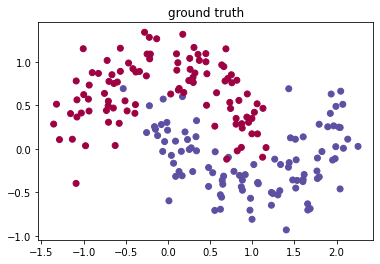

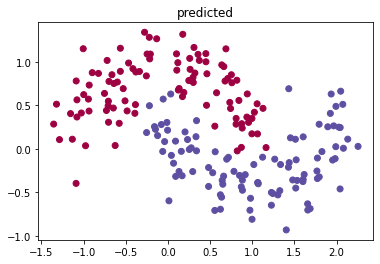

In [13]:
# predict results & plot results
y_res  = nn.forward(X)
y_pred = np.argmax(y_res, axis=1)

# plot data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
plt.title("ground truth")
plt.show()

plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=plt.cm.Spectral)
plt.title("predicted")
plt.show()

## 10. 深入分析与问题

In [14]:
# print some results

print(y_res[1:10, :])

[[0.01102277 0.98892257]
 [0.13689246 0.86620671]
 [0.97904664 0.02132821]
 [0.01163523 0.98829983]
 [0.00717948 0.99279357]
 [0.95281465 0.04607736]
 [0.01748735 0.98260651]
 [0.97215654 0.0271742 ]
 [0.03769688 0.96206663]]


**问题**
1. 我们希望得到的每个类别的概率，如何实现？
2. 如何做多分类问题？
3. 如何能让神经网络更快的训练好？
4. 如何更好的构建网络的类定义和接口设计，从而让神经网络的类支持更多的类型的处理层？

## References

* [零基础入门深度学习(3) - 神经网络和反向传播算法](https://www.zybuluo.com/hanbingtao/note/476663)
* [Neural Network Using Python and Numpy](https://www.python-course.eu/neural_networks_with_python_numpy.php)
* http://www.cedar.buffalo.edu/%7Esrihari/CSE574/Chap5/Chap5.3-BackProp.pdf
* https://mattmazur.com/2015/03/17/a-step-by-step-backpropagation-example/
